In [1]:
# This would be the main notebook that would be run to execute the entire project
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Training and Plotting methods

In [2]:
def plot_scatter(test, prediction):
    # Plot the predicted values against the actual values in scatter plot
    fig, ax1 = plt.subplots()
    ax1.plot(test, test, color='yellow', label='Actual Values')
    ax2 = ax1.twinx()
    ax2.plot(prediction, prediction, color='red', label='Predicted Values')
    plt.title("Actual vs Predicted values")
    plt.scatter(test, prediction, alpha=0.5)
    fig.legend()
    plt.show()

def plot_line(test, prediction):
    # Plot the predicted values against the actual values in line plot
    fig, ax1 = plt.subplots()

    ax1.plot(test, color='yellow', label='Actual Values', alpha=0.5)

    ax2 = ax1.twinx()

    ax2.plot(prediction, color='red', label='Predicted Values', alpha=0.5)

    plt.title("Actual vs Predicted values")
    fig.legend()
    plt.show()


In [3]:
# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')
# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')

def train_predict_model(model):
    
    # variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,start_region_id,start_poi_ids,dest_region_id,dest_poi_ids
    # dependent variable: order_gap, supply, demand
    # independent variables: time_slot,weekday,temperature,pm25,start_region_id,start_poi_ids,dest_region_id,dest_poi_ids

    # Split the data into independent and dependent variables
    X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
    y = data['order_gap']

    # Create a model and fit the data
    ml = model()
    ml.fit(X, y)

    # Predict the values for the test set
    y_pred = ml.predict(test_data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']])

    # Compute the R-squared score for the Linear Regression model
    accuracy = r2_score(test_data['supply'], y_pred)

    # Print the accuracy
    print("Accuracy of model:", accuracy)

    # Calculate the mean absolute error
    mae = np.mean(np.abs(test_data['supply'] - y_pred))

    # Print the result
    print('Mean Absolute Error:', mae)

    # Plot the predicted values against the actual values in scatter plot
    plot_scatter(test_data['supply'], y_pred)

    # Plot the predicted values against the actual values in line plot
    plot_line(test_data['supply'], y_pred)

## Linear Regression:

Accuracy of model: 0.010337428861254105
Mean Absolute Error: 5.749197629946746


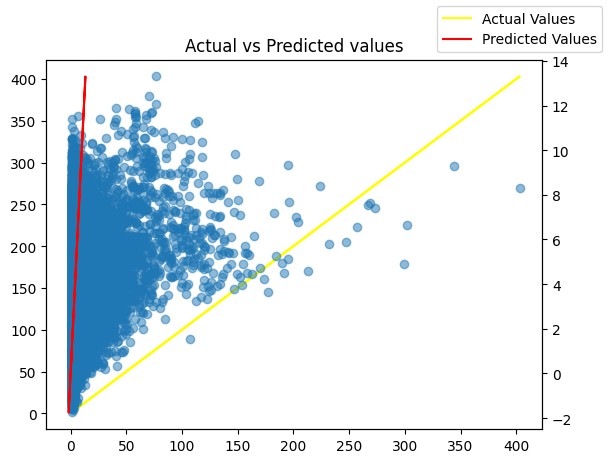

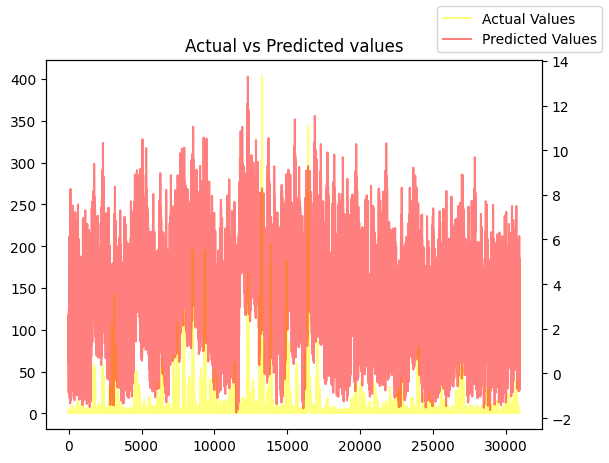

In [4]:
from sklearn.linear_model import LinearRegression

# Train and Predict using model
train_predict_model(LinearRegression)


## Decision Tree Regression:

Accuracy of model: 0.1051390203322623
Mean Absolute Error: 5.106360961096918


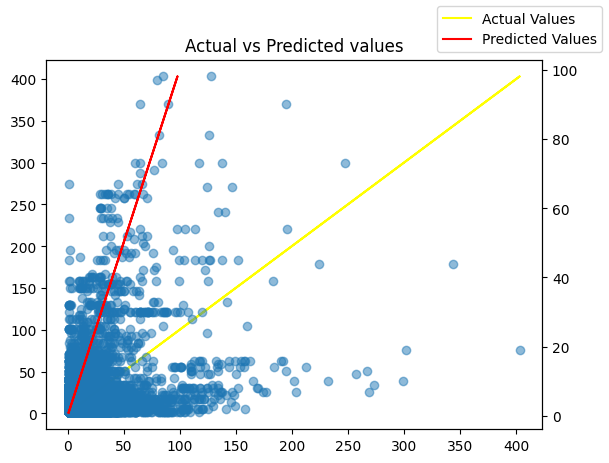

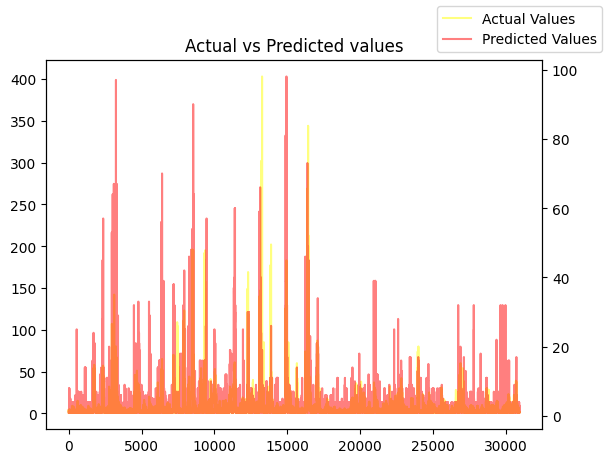

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model and fit the data
train_predict_model(DecisionTreeRegressor)


## Random Forest Regression:

Accuracy of model: 0.1958133060437438
Mean Absolute Error: 4.768386961161594


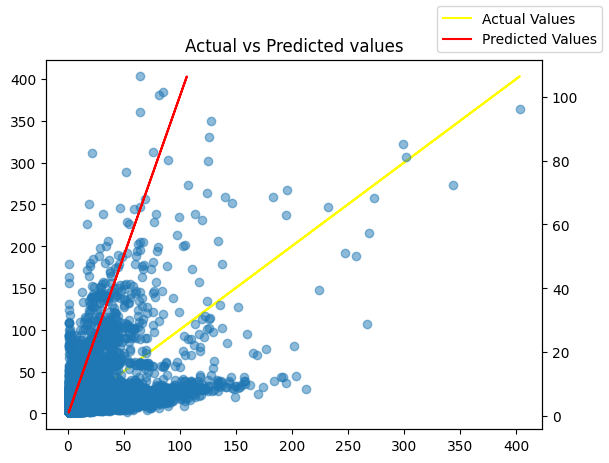

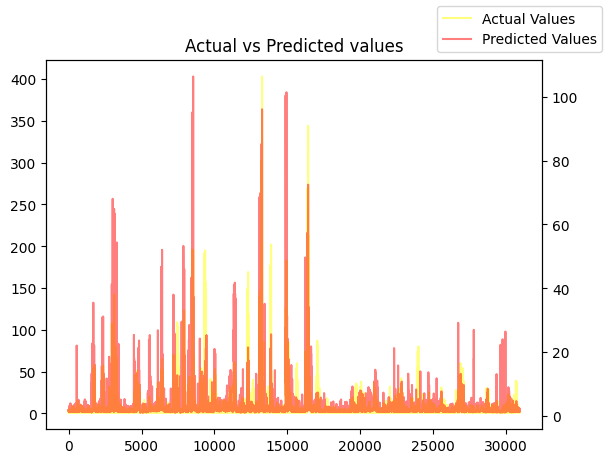

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model and fit the data
train_predict_model(RandomForestRegressor)

## XGBoost Regression:

In [7]:
# !pip install xgboost

Accuracy of model: -0.32487380591908677
Mean Absolute Error: 6.847874969751133


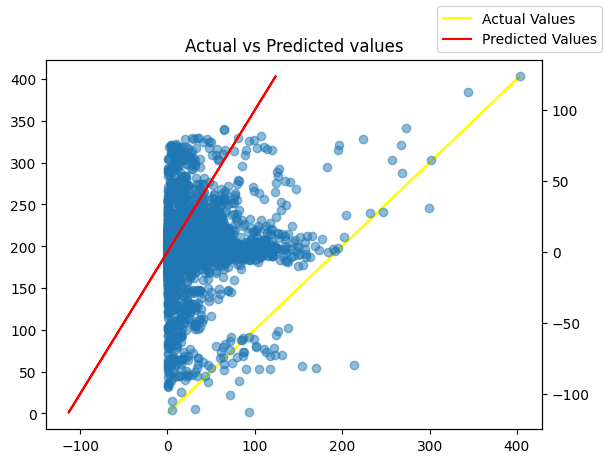

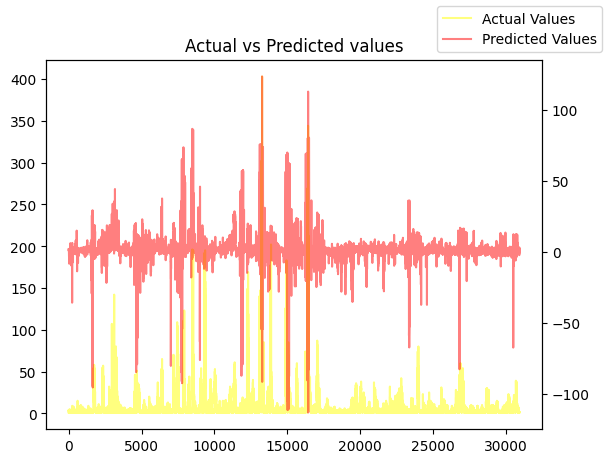

In [8]:
from xgboost import XGBRegressor

# Create a XGB model and fit the data
train_predict_model(XGBRegressor)

## Final RandomForestRegressor Model with rolling windows: 

In [9]:
def plot_rolling_window_line(test, prediction, window_size):
    # Apply a rolling average to the predicted values
    rolling_predictions = pd.Series(predictions).rolling(window_size).mean().values

    # Plot the mean predicted values against the actual values
    fig, ax1 = plt.subplots()
    ax1.plot(test_data['supply'], color='blue', label='Actual Values', alpha=0.5)
    ax1.set_ylabel('Actual Values')
    ax2 = ax1.twinx()
    ax2.plot(rolling_predictions, color='red', label='Mean Predicted Values', alpha=0.5)
    ax2.set_ylabel('Mean Predicted Values')
    plt.title("Actual vs Mean Predicted values")
    fig.legend()
    plt.show()

In [14]:
def train_predict_rolling_window(model, window_size):
    # Split the data into independent and dependent variables
    # and select the first 100 windows of data
    X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
    y = data['order_gap']


    # Create a Linear Regression model
    ml = model()

    # Fit the model to the current window of data
    ml.fit(X, y)

    # Create an empty list to store the predicted values for each window
    predictions = []

    # Iterate through the data using a rolling window approach
    for i in range(window_size, len(test_data) + 1):
        if i % 100 == 0:
            print("Window number:", i//100)

        window = test_data.iloc[i - window_size : i, :]
        X_window = window[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
        y_window = window['supply']
            
        # Predict the values for the window
        y_pred = ml.predict(X_window)
        
        mae = np.mean(np.abs(y_window - y_pred))
        # Add the predicted values to the list
        predictions.append(mae)

    # Calculate the mean of the predicted values for all windows
    mean_prediction = np.mean(predictions, axis=0)

    # minimum prediction
    min_prediction = np.min(predictions, axis=0)

    # max prediction
    max_prediction = np.max(predictions, axis=0)

    # Print the result
    print('Minimum prediction:', min_prediction)
    print('Maximum prediction:', max_prediction)
    print('Mean Absolute Error for the mean prediction:', mean_prediction)

    plot_rolling_window_line(test_data['supply'], predictions, window_size)



In [19]:
data.count()
test_data.count()

time_slot          30923
weekday            30923
supply             30923
temperature        30923
pm25               30923
start_region_id    30923
start_poi_ids      30923
dest_region_id     30923
dest_poi_ids       30923
dtype: int64

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train and Predict using model with rolling window
train_predict_rolling_window(RandomForestRegressor, 100)


KeyboardInterrupt: 